In [2]:
from datetime import datetime
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import stor
import sys
from scipy import stats

In [3]:
df_iseq = pd.read_csv("/Users/rchin/Downloads/batch_basic_stats.basic_stats_human_iseq.csv")
df_ibc = pd.read_csv("/Users/rchin/Downloads/BPA73020-2824.manifest_clean 4.5.csv")
df_hiseq= pd.read_csv("/Users/rchin/Downloads/batch_basic_stats.basic_stats_human_hiseq4k.csv")
df_hbc = pd.read_csv("/Users/rchin/Downloads/H53HGBBXY.manifest_clean 4.8.csv")

In [4]:
df_iseq.head()


,unique_id,sample,total_mapped_reads_pre_dedupe,total_mapped_reads,total_unmapped_reads,ILMN_adapters,duped_reads,mapped_freq,unmapped_freq,library_complexity,Q30,Q20,contamination,reads_aligned_at_duped_pos,proximal_dup_reads,proximal_dup_rate,max_contamination,total_contamination
0,IPS_RES_919835,265477f9-444e-4ce0-ae0d-7be0a7b31c82,3291,3056,217,57,235,0.933700,0.066300,0.928593,0.979649,0.993896,0.750000,726,357,0.108478,1.0,1.0
1,IPS_RES_919836,cc6bc0fe-cbd4-4be5-9084-e1812b0090d8,4938,4570,296,54,368,0.939170,0.060830,0.925476,0.980713,0.994020,0.600000,1041,570,0.115431,1.0,1.0
2,IPS_RES_919837,4e2bc7c8-eb4a-4054-8a95-c347ae7496e7,4171,3873,243,33,298,0.940962,0.059038,0.928554,0.980415,0.993810,0.750000,852,469,0.112443,1.0,1.0
3,IPS_RES_919838,3078b7f9-13f6-447b-8290-25b5a12b164d,3997,3689,225,74,308,0.942514,0.057486,0.922942,0.977757,0.993061,0.666667,891,484,0.121091,1.0,1.0
4,IPS_RES_919839,224b955f-5dc6-4d80-b9d5-d9799158f7da,3877,3578,254,128,299,0.933716,0.066284,0.922879,0.975654,0.992308,0.571429,953,480,0.123807,1.0,1.0


In [254]:
df_ibc.head()

,barcode,deduped_bam,final_bam,final_vcf,flowcell_barcode,initial_bam,lane,processing_group,sample,plate,coor,conc,species,unique_id,algo_final_conc,calc_final_conc
0,CATTGGTT,IPS_CLN_RCSET1_A01_.deduped.bam,IPS_CLN_RCSET1_A01.bam,unique_id.vcf,BPA73020-2824,s_1_CATTGGTT_BPA73020-2824_p_IPS_CLN_RCSET1_A0...,1,BPA73020-2824_MRT0,9015aabc-7bda-4187-8578-78a3bb0d32a2,IPS_CLN_RCSET1,A01,3.571,human,IPS_CLN_RCSET1_A01,0.02082,0.02082
1,GCCTGGTT,IPS_CLN_RCSET1_A02_.deduped.bam,IPS_CLN_RCSET1_A02.bam,unique_id.vcf,BPA73020-2824,s_1_GCCTGGTT_BPA73020-2824_p_IPS_CLN_RCSET1_A0...,1,BPA73020-2824_MRT0,103a03bc-c94b-42af-ac85-9c05e979bc4c,IPS_CLN_RCSET1,A02,3.304,human,IPS_CLN_RCSET1_A02,0.02084,0.02084
2,TACCGGTT,IPS_CLN_RCSET1_A03_.deduped.bam,IPS_CLN_RCSET1_A03.bam,unique_id.vcf,BPA73020-2824,s_1_TACCGGTT_BPA73020-2824_p_IPS_CLN_RCSET1_A0...,1,BPA73020-2824_MRT0,33e9ea4e-05e9-4833-869d-222f149f6ad2,IPS_CLN_RCSET1,A03,3.975,human,IPS_CLN_RCSET1_A03,0.02084,0.02084
3,CGACGGTT,IPS_CLN_RCSET1_A04_.deduped.bam,IPS_CLN_RCSET1_A04.bam,unique_id.vcf,BPA73020-2824,s_1_CGACGGTT_BPA73020-2824_p_IPS_CLN_RCSET1_A0...,1,BPA73020-2824_MRT0,b94bdc86-2c11-4076-a724-86bce646708a,IPS_CLN_RCSET1,A04,4.019,human,IPS_CLN_RCSET1_A04,0.02083,0.02083
4,ATCTCGTT,IPS_CLN_RCSET1_A05_.deduped.bam,IPS_CLN_RCSET1_A05.bam,unique_id.vcf,BPA73020-2824,s_1_ATCTCGTT_BPA73020-2824_p_IPS_CLN_RCSET1_A0...,1,BPA73020-2824_MRT0,e0b425c0-9278-4898-a633-e6409352a863,IPS_CLN_RCSET1,A05,3.925,human,IPS_CLN_RCSET1_A05,0.02083,0.02083


In [5]:
# Merge iSeq samplesheet with iSeq qc metrics
df_icombine = pd.merge(df_ibc, df_iseq, on="sample")

In [6]:
# Fix typo in loc[141] from 'IPS_XY_Pooled_IPS_CLN_RCSET_D10' to 'IPS_XY_Pooled_IPS_CLN_RCSET2_D10'
# print (df_icombine['sample'].loc[141])

df_icombine.at[141,'sample'] = 'IPS_XY_Pooled_IPS_CLN_RCSET2_D10'
print (df_icombine['sample'].loc[141])
len(df_icombine)

IPS_XY_Pooled_IPS_CLN_RCSET2_D10


668

In [9]:
# Merge hiseq samplesheet with hiseq qc metrics
df_hcombine = pd.merge(df_hbc, df_hiseq, on="sample")

In [18]:
# df_icombine.to_csv("/Users/rchin/Downloads/BPA73020-2824.combine.csv")

In [7]:
df_hiseq.head()

,unique_id,sample,total_mapped_reads_pre_dedupe,total_mapped_reads,total_unmapped_reads,ILMN_adapters,duped_reads,mapped_freq,unmapped_freq,library_complexity,Q30,Q20,contamination,reads_aligned_at_duped_pos,proximal_dup_reads,proximal_dup_rate,max_contamination,total_contamination
0,IPS_RES_923655,b1d89897-7e63-4be7-bfe3-05a3f447bbc9,2823421,2466119,190943,56889,357302,0.928138,0.071862,0.873451,0.971176,0.989217,0.979947,886558,162499,0.057554,0.019336,0.979947
1,IPS_RES_923656,6f9be5a3-adf9-4a19-8ce8-d4af8c03fd95,2489055,2200637,171876,42261,288418,0.927555,0.072445,0.884126,0.970282,0.988845,0.980327,731029,130169,0.052297,0.018673,0.980327
2,IPS_RES_923657,2a906271-8662-4c49-baa8-bb260491f66f,3156263,2768832,212506,48799,387431,0.928721,0.071279,0.877250,0.971251,0.989251,0.979345,951725,169102,0.053577,0.020029,0.979345
3,IPS_RES_923658,364c4136-2ae2-4722-b90d-310567e67b77,4258508,3699065,305378,20932,559443,0.923740,0.076260,0.868629,0.971062,0.989193,0.979904,1314436,257458,0.060457,0.019139,0.979904
4,IPS_RES_923659,03582df6-006a-44e3-b9db-df519bb3bc60,3649863,3169623,273448,51924,480240,0.920580,0.079420,0.868422,0.969056,0.988098,0.978202,1177607,224608,0.061539,0.020328,0.978202


In [8]:
df_hbc.head()

,barcode,deduped_bam,final_bam,final_vcf,flowcell_barcode,initial_bam,lane,processing_group,sample,plate,coor,conc,species,unique_id,algo_final_conc,calc_final_conc
0,AACCAATG,IPS_CLN_RCSET1_A01_.deduped.bam,IPS_CLN_RCSET1_A01.bam,unique_id.vcf,H53HGBBXY,s_1_AACCAATG_H53HGBBXY_p_IPS_CLN_RCSET1_A01.bam,1,H53HGBBXY_MRT0,9015aabc-7bda-4187-8578-78a3bb0d32a2,IPS_CLN_RCSET1,A01,3.571,human,IPS_CLN_RCSET1_A01,0.02082,0.02082
1,AACCAATG,IPS_CLN_RCSET1_A01_.deduped.bam,IPS_CLN_RCSET1_A01.bam,unique_id.vcf,H53HGBBXY,s_2_AACCAATG_H53HGBBXY_p_IPS_CLN_RCSET1_A01.bam,2,H53HGBBXY_MRT0,9015aabc-7bda-4187-8578-78a3bb0d32a2,IPS_CLN_RCSET1,A01,3.571,human,IPS_CLN_RCSET1_A01,0.02082,0.02082
2,AACCAATG,IPS_CLN_RCSET1_A01_.deduped.bam,IPS_CLN_RCSET1_A01.bam,unique_id.vcf,H53HGBBXY,s_3_AACCAATG_H53HGBBXY_p_IPS_CLN_RCSET1_A01.bam,3,H53HGBBXY_MRT0,9015aabc-7bda-4187-8578-78a3bb0d32a2,IPS_CLN_RCSET1,A01,3.571,human,IPS_CLN_RCSET1_A01,0.02082,0.02082
3,AACCAATG,IPS_CLN_RCSET1_A01_.deduped.bam,IPS_CLN_RCSET1_A01.bam,unique_id.vcf,H53HGBBXY,s_4_AACCAATG_H53HGBBXY_p_IPS_CLN_RCSET1_A01.bam,4,H53HGBBXY_MRT0,9015aabc-7bda-4187-8578-78a3bb0d32a2,IPS_CLN_RCSET1,A01,3.571,human,IPS_CLN_RCSET1_A01,0.02082,0.02082
4,AACCAATG,IPS_CLN_RCSET1_A01_.deduped.bam,IPS_CLN_RCSET1_A01.bam,unique_id.vcf,H53HGBBXY,s_5_AACCAATG_H53HGBBXY_p_IPS_CLN_RCSET1_A01.bam,5,H53HGBBXY_MRT0,9015aabc-7bda-4187-8578-78a3bb0d32a2,IPS_CLN_RCSET1,A01,3.571,human,IPS_CLN_RCSET1_A01,0.02082,0.02082


In [10]:
len(df_hcombine)

5344

In [313]:
# df_hcombine.to_csv("/Users/rchin/Downloads/H53HGBBXY.combine.csv")

In [11]:
# consolidate sample sheet to one lane
df_hcombine1 = df_hcombine[df_hcombine['lane'] == 1]
# df_hcombine1.reset_index().tail()
len(df_hcombine1)
# print (df_hcombine1.tail())

668

In [92]:
# merge iSeq and HiSeq QC Metrics/samplesheet
# df_icombine1 = pd.read_csv('/Users/rchin/Downloads/BPA73020-2824.combine spar3404.csv') #fixed typo in icombine.loc[141]
df_merge = pd.merge(df_hcombine1,df_icombine, on="sample", suffixes=('_hiseq', '_iseq'), how='outer', indicator=True)

# Remove failed wells (wells that did not get consolidated [406,161,654]
df_merge = df_merge.drop([406,161,654]).reset_index()

In [94]:
# df_merge[df_merge['_merge'] != 'both']
print (len(df_merge))
print (df_merge.tail())
# print (df_merge.total_mapped_reads_hiseq[404:408])
# print (df_merge.loc[406])

665
     index barcode_hiseq                deduped_bam_hiseq  \
660    663      TTACGGTA  IPS_CLN_RCSET7_H08_.deduped.bam   
661    664      TTCGACGA  IPS_CLN_RCSET7_H09_.deduped.bam   
662    665      TTCGCTCG  IPS_CLN_RCSET7_H10_.deduped.bam   
663    666      TTCTCAGG  IPS_CLN_RCSET7_H11_.deduped.bam   
664    667      TTGACTCT  IPS_CLN_RCSET7_H12_.deduped.bam   

            final_bam_hiseq final_vcf_hiseq flowcell_barcode_hiseq  \
660  IPS_CLN_RCSET7_H08.bam   unique_id.vcf              H53HGBBXY   
661  IPS_CLN_RCSET7_H09.bam   unique_id.vcf              H53HGBBXY   
662  IPS_CLN_RCSET7_H10.bam   unique_id.vcf              H53HGBBXY   
663  IPS_CLN_RCSET7_H11.bam   unique_id.vcf              H53HGBBXY   
664  IPS_CLN_RCSET7_H12.bam   unique_id.vcf              H53HGBBXY   

                                   initial_bam_hiseq  lane_hiseq  \
660  s_1_TTACGGTA_H53HGBBXY_p_IPS_CLN_RCSET7_H08.bam           1   
661  s_1_TTCGACGA_H53HGBBXY_p_IPS_CLN_RCSET7_H09.bam           1   
662 

In [337]:
# df_merge.to_csv("/Users/rchin/Downloads/iseq_hiseq_merge_4.11.csv")

In [95]:
# Calculate linear regression iSeq v HiSeq
slope, intercept, r_value, p_value, std_err =\
    stats.linregress(df_merge.total_mapped_reads_iseq, df_merge.total_mapped_reads_hiseq)
print ('trendline:', slope,'x +', intercept)
print ('r-squared:',r_value**2)

trendline: 703.9727373076795 x + 209050.228387631
r-squared: 0.9060706841590882


In [132]:
# Calculate Cv for iSeq and HiSeq mapped reads
cv_i = stats.variation(df_merge.total_mapped_reads_iseq)
cv_h = stats.variation(df_merge.total_mapped_reads_hiseq)
print ("iseqCV =", cv_i, "hiseqCV =", cv_h)

iseqCV = 0.19549006989536202 hiseqCV = 0.1906440514026765


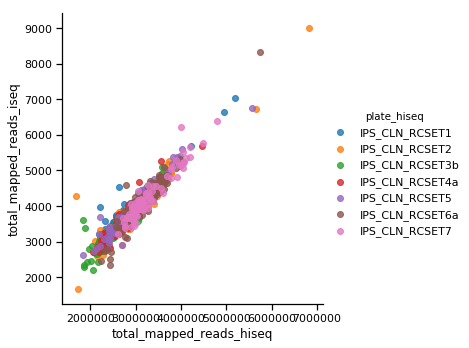

In [29]:
sns.set_context('notebook')
sns.lmplot(data=df_merge, x='total_mapped_reads_hiseq', y='total_mapped_reads_iseq', hue='plate_hiseq',
               fit_reg=False)
# plt.plot([0, 700000], [0, 700000], 'r-', linewidth=1
# g.savefig("/Users/rchin/Downloads/hiseq_iseq_scatter_4.9.png")

In [18]:
plate_list=['IPS_CLN_RCSET1','IPS_CLN_RCSET2', 'IPS_CLN_RCSET3b', 'IPS_CLN_RCSET4a', 'IPS_CLN_RCSET5',
            'IPS_CLN_RCSET6a', 'IPS_CLN_RCSET7']

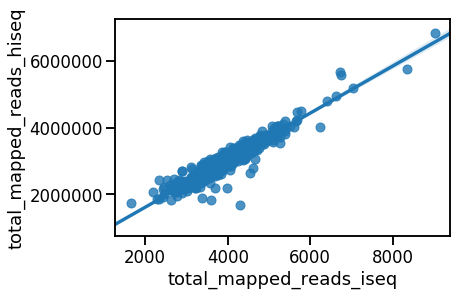

In [80]:
sns.set_context('talk')
sns.regplot(data=df_merge, x='total_mapped_reads_iseq', y='total_mapped_reads_hiseq')

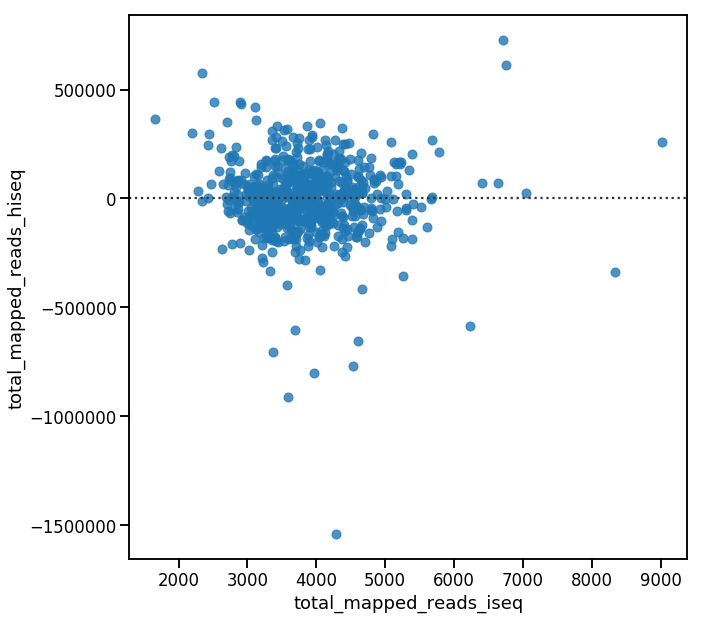

In [81]:
#residual plot
plt.figure(figsize=(10, 10))
sns.set_context('talk')
resid = sns.residplot(data=df_merge, x='total_mapped_reads_iseq', y='total_mapped_reads_hiseq')
# figure = resid.get_figure()
# figure.savefig("/Users/rchin/Downloads/hiseq_iseq_resid_4.11.png", bbox_inches = 'tight')

In [82]:
# Python program to find the distance between 
# a given point and a given line in 2 D. 
# Total Least Squares, Deming regression, Orthogonal distance
  
import math 
  
# Function to find distance 
def shortest_distance(x1, y1, a, b, c):  

#     print(x1, y1)
#     print(a, b, c)
#     print(a * x1 + b * y1 + c)
#     print (math.sqrt(a * a + b * b))
    d = (a * x1 + b * y1 + c) / (math.sqrt(a * a + b * b)) 
#     print(("Perpendicular distance is"),d )
    return d
    
shortest_distance(df_merge.total_mapped_reads_iseq[0], df_merge.total_mapped_reads_hiseq[0], slope, -1, intercept)

186.70623372949652

In [97]:
# To add column for perpendicular orthogonal values, 
# (perpendicular distance from point to trend line) using linregress slope/intercept
orthog_series = pd.Series()
for i, row in df_merge.iterrows():
#     print(row)
    orthogonal = pd.Series([shortest_distance(row.total_mapped_reads_iseq, row.total_mapped_reads_hiseq,
                                                     slope,-1, intercept)])
    orthog_series = orthog_series.append(orthogonal, ignore_index=True)
# orthog_series.reset_index()
print (orthog_series[:20])
    

0     186.706234
1     194.334576
2     394.973462
3      -7.692270
4     465.241406
5      75.356809
6      46.634941
7      -5.684336
8    -161.683624
9      92.248882
10    149.279211
11    -59.167294
12      6.206864
13    177.955933
14    283.985310
15     67.254380
16     37.342226
17     58.187219
18    197.736372
19    244.895173
dtype: float64


In [98]:
df_merge['orthogonal'] = orthog_series
df_merge['abs_orthogonal'] = abs(orthog_series)

In [99]:
# Function to calculate residual
def y_distance(x1, y1, a, c):
    y_d = y1 - (a * x1 + c)
    return y_d

In [100]:
# To add column for residual values (y-axis distance from point to trendline) using linregress slope/intercept
residual_series = pd.Series()
for i, row in df_merge.iterrows():
    residual = pd.Series([y_distance(row.total_mapped_reads_iseq, row.total_mapped_reads_hiseq, slope, intercept)])
    residual_series = residual_series.append(residual, ignore_index=True)

print (residual_series[:20])

0    -131436.231040
1    -136806.381592
2    -278050.829715
3       5415.153949
4    -327517.596382
5     -53049.192961
6     -32829.759847
7       4001.621830
8     113820.978342
9     -64940.763159
10   -105088.600686
11     41652.204170
12     -4369.467685
13   -125276.251791
14   -199918.117574
15    -47345.297485
16    -26287.935455
17    -40962.257310
18   -139201.155764
19   -172399.698921
dtype: float64


In [101]:
#add residual and percent residual(percent change required to get point to trend line.)
df_merge['residual'] = residual_series  #residual is y-distance
df_merge['abs_residual'] = abs(df_merge['residual'])
# df_merge['cv_residual'] = stats.variation(df_merge.residual)
df_merge['pct_residual'] = (residual_series / df_merge.total_mapped_reads_hiseq * -1)
df_merge['abs_pct_residual'] = abs(df_merge['pct_residual'])

In [102]:
#Add column for new consolidation ratio using percent residual as offset value
#columns: algo_final_conc_iseq, conc_iseq, pct_residual
df_merge['iseq_adjusted_consol_conc'] = df_merge['algo_final_conc_iseq'] + (df_merge['algo_final_conc_iseq'] * df_merge['pct_residual'])

In [138]:
# print (df_merge.tail())
# cv_r = stats.variation(df_merge.residual)
# print (cv_r)
print ("Residual Standard Deviation:", df_merge.residual.std())

Residual Standard Deviation: 170438.92572844308


In [47]:
#consolidate dataframe to fewer columns for export
condense_col = ['barcode_hiseq','sample','plate_hiseq', 'coor_hiseq', 'plate_coor', 
                'total_mapped_reads_pre_dedupe_hiseq', 'total_mapped_reads_hiseq', 'total_unmapped_reads_hiseq',
                'total_mapped_reads_pre_dedupe_iseq', 'total_mapped_reads_iseq', 'total_unmapped_reads_iseq',
                'orthogonal', 'abs_orthogonal', 'residual', 'abs_residual', 'cv_residual', 'pct_residual', 
                'abs_pct_residual', 'iseq_adjusted_consol_conc']
summary = ['barcode_hiseq', 'plate_coor', 'residual', 'abs_residual', 'pct_residual', 
           'abs_pct_residual', 'iseq_adjusted_consol_conc']
consol_summary = ['barcode_hiseq', 'plate_coor', 'residual', 'abs_residual', 'pct_residual', 
           'abs_pct_residual', 'conc_iseq', 'algo_final_conc_iseq', 'iseq_adjusted_consol_conc']
df_merge=df_merge.rename(columns = {'unique_id_x_hiseq':'plate_coor'})

df_merge_condense = df_merge[condense_col]
df_merge_summary = df_merge[summary]
df_merge_consol_summary = df_merge[consol_summary]

In [48]:
# df_merge_condense.loc[116]  point with largest residual
# remove samples that were excluded (as NTC) [406,161,654]
df_sort_condense = df_merge_condense.sort_values(by=['abs_pct_residual'], ascending=False)
df_sort_condense.head(20)
df_sort_summary = df_merge_summary.sort_values(by=['abs_pct_residual'], ascending=False)
df_sort_summary.head(20)
df_merge_consol_summary = df_merge_consol_summary.sort_values(by=['abs_pct_residual'], ascending=False)

Text(1000, 3000000, 'Y = 703.973x + 209050.23')

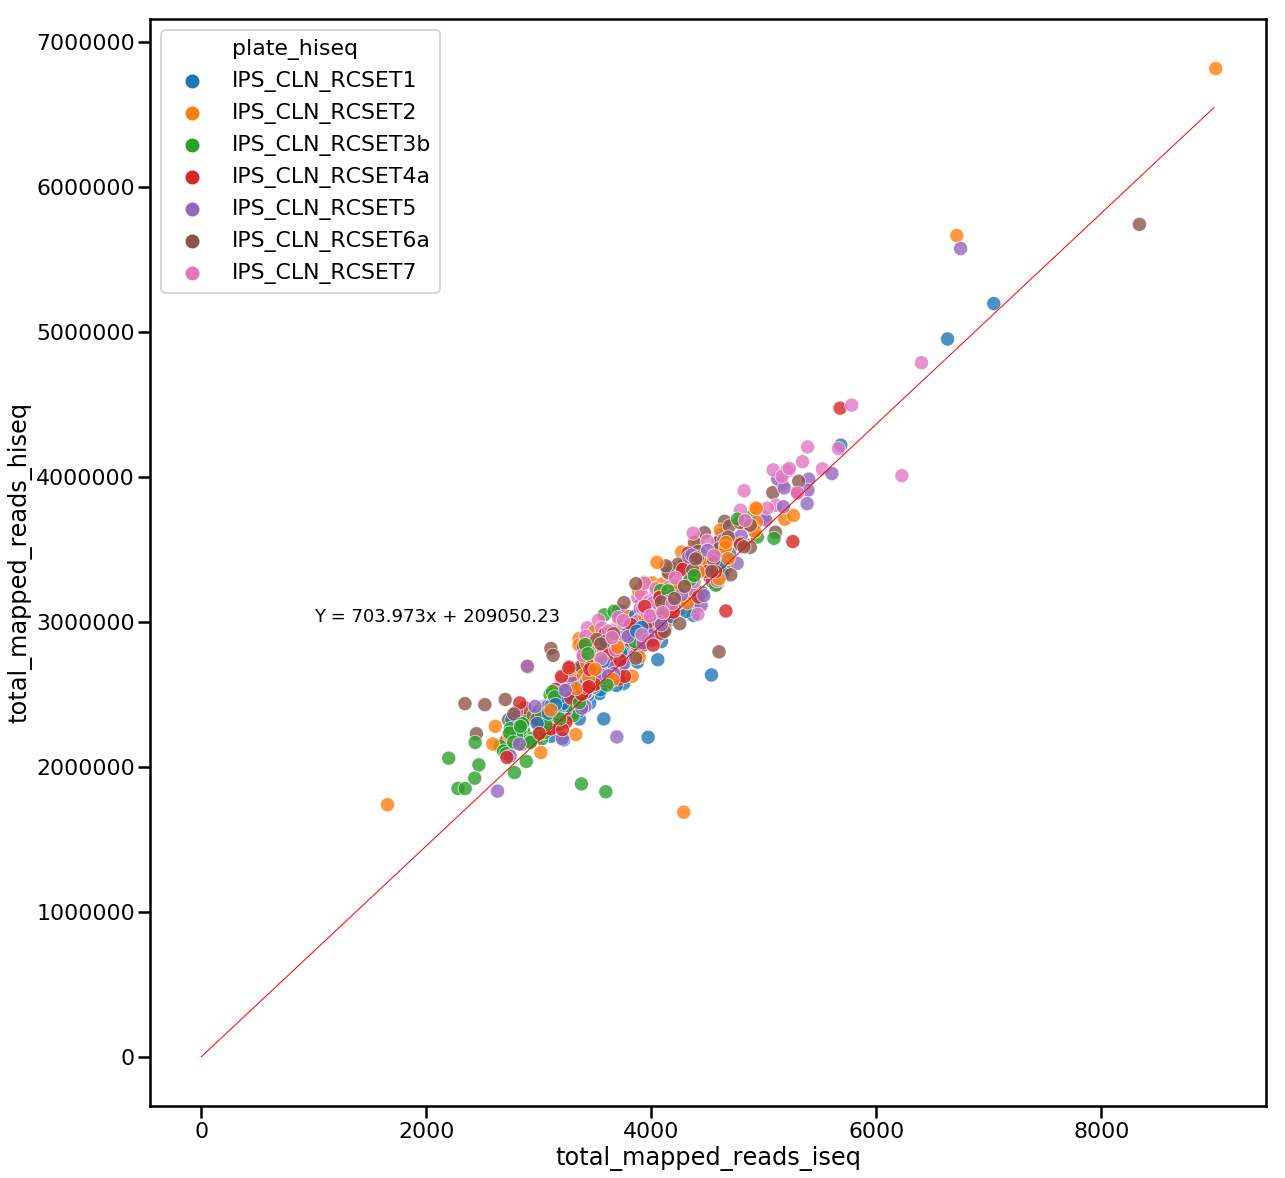

In [41]:
# Plot scatterplot with hue for primer set
plt.figure(figsize=(20, 20))
sns.set_context("poster")
scat = sns.scatterplot(data=df_sort_condense, x='total_mapped_reads_iseq', y='total_mapped_reads_hiseq',
                       hue='plate_hiseq', alpha=.8, s=200, hue_order=plate_list)

line = slope * 9000 + intercept
plt.plot([0,9000],[0,line], 'r-', linewidth=1)

equation = 'Y = ' + str('{0:.6g}'.format(slope)) + 'x + ' + str('{0:.8g}'.format(intercept))
plt.text(1000,3000000,equation, label='trendline', fontsize=18)
    
# plt.plot([0,9000],[0,7000000], 'r-', linewidth=1)
# plot residual line to point with higest residual [116]
# to do: plt.plot([df_merge.total_mapped_reads_iseq[116], ],[df_merge.total_mapped_reads_hiseq[116], ] , )


In [42]:
figure = scat.get_figure()
figure.savefig("/Users/rchin/Downloads/hiseq_iseq_scatter_4.16.png", bbox_inches = 'tight')

In [141]:
# df_merge.to_csv("/Users/rchin/Downloads/iseq_hiseq_merge_4.16.csv")
# df_sort_condense.to_csv("/Users/rchin/Downloads/iseq_hiseq_merge_condense_4.16.csv")
# df_sort_summary.to_csv("/Users/rchin/Downloads/iseq_hiseq_merge_summary_4.16.csv")
# df_merge_consol_summary.to_csv("/Users/rchin/Downloads/iseq_hiseq_consol_summary_4.16.csv")

In [140]:
df_merge.columns

Index(['index', 'barcode_hiseq', 'deduped_bam_hiseq', 'final_bam_hiseq',
       'final_vcf_hiseq', 'flowcell_barcode_hiseq', 'initial_bam_hiseq',
       'lane_hiseq', 'processing_group_hiseq', 'sample', 'plate_hiseq',
       'coor_hiseq', 'conc_hiseq', 'species_hiseq', 'unique_id_x_hiseq',
       'algo_final_conc_hiseq', 'calc_final_conc_hiseq', 'unique_id_y_hiseq',
       'total_mapped_reads_pre_dedupe_hiseq', 'total_mapped_reads_hiseq',
       'total_unmapped_reads_hiseq', 'ILMN_adapters_hiseq',
       'duped_reads_hiseq', 'mapped_freq_hiseq', 'unmapped_freq_hiseq',
       'library_complexity_hiseq', 'Q30_hiseq', 'Q20_hiseq',
       'contamination_hiseq', 'reads_aligned_at_duped_pos_hiseq',
       'proximal_dup_reads_hiseq', 'proximal_dup_rate_hiseq',
       'max_contamination_hiseq', 'total_contamination_hiseq', 'barcode_iseq',
       'deduped_bam_iseq', 'final_bam_iseq', 'final_vcf_iseq',
       'flowcell_barcode_iseq', 'initial_bam_iseq', 'lane_iseq',
       'processing_group_iseq